In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
date_parser = lambda ts: datetime.strptime(ts, "%y-%m-%dT%H:%M:%SZ")
df = pd.read_csv('./pricing/aviasales_data_t.csv')
df['requested_at'] = pd.to_datetime(df['requested_at'], format="%y-%m-%dT%H:%M:%SZ", errors="coerce")
df['departure_at'] = pd.to_datetime(df['departure_at'], format="%Y-%m-%dT%H:%M:%SZ", errors="coerce")
df['expires_at'] = pd.to_datetime(df['expires_at'], format="%Y-%m-%dT%H:%M:%SZ", errors="coerce")
df['price'] = pd.to_numeric(df["price"], errors="coerce")
df = df.dropna()
df

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
0,MOW,LED,2021-03-06 18:45:00,DP,205,3568.0,2021-03-06 13:24:28,2021-03-06 10:28:54
1,MOW,LED,2021-03-07 04:20:00,U6,9631,2438.0,2021-03-07 04:20:00,2021-03-06 10:28:54
2,MOW,LED,2021-03-08 03:45:00,DP,201,2411.0,2021-03-08 03:45:00,2021-03-06 10:28:54
3,MOW,LED,2021-03-09 05:10:00,DP,207,2618.0,2021-03-09 05:10:00,2021-03-06 10:28:54
4,MOW,LED,2021-03-10 04:30:00,DP,209,2468.0,2021-03-09 06:15:06,2021-03-06 10:28:54
...,...,...,...,...,...,...,...,...
215971,SVX,SGC,2021-03-31 16:05:00,UT,112,10070.0,2021-03-31 16:05:00,2021-03-30 06:30:04
215972,SVX,OVB,2021-03-30 13:40:00,U6,266,12811.0,2021-03-30 13:40:00,2021-03-30 06:30:04
215973,SVX,OVB,2021-03-31 13:40:00,U6,266,9773.0,2021-03-31 13:40:00,2021-03-30 06:30:04
215974,SVX,VVO,2021-03-30 10:30:00,S7,5018,29272.0,2021-03-30 10:30:00,2021-03-30 06:30:04


In [4]:
# Duplicates? What we consider to be one of them?
# -- Entries with the same 'departure_at', 'expires_at', 'flight_number', 'price' -- Middle priority, easy to fix
df = df.drop_duplicates(subset=['departure_at', 'expires_at', 'flight_number', 'price'], keep='first')

In [5]:
# pp stats
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.std()

departure_at    73 days 19:27:20.124427752
price                          4453.230252
expires_at       5 days 03:49:09.846492555
requested_at     5 days 01:42:47.022705596
dtype: object

In [7]:
# Fix flight_number and look on the dynamics (foreach)
old_inspected = df[df['flight_number'] == str(207)]
old_inspected

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
3,MOW,LED,2021-03-09 05:10:00,DP,207,2618.0,2021-03-09 05:10:00,2021-03-06 10:28:54
5,MOW,LED,2021-03-11 05:10:00,DP,207,2449.0,2021-03-08 21:55:05,2021-03-06 10:28:54
4182,MOW,LED,2021-03-09 05:10:00,DP,207,2577.0,2021-03-09 05:10:00,2021-03-06 16:05:28
4184,MOW,LED,2021-03-11 05:10:00,DP,207,2423.0,2021-03-09 06:25:36,2021-03-06 16:05:28
4190,MOW,LED,2021-03-17 07:10:00,DP,207,2577.0,2021-03-09 09:19:12,2021-03-06 16:05:28
...,...,...,...,...,...,...,...,...
192101,MOW,LED,2021-05-10 19:15:00,DP,207,3848.0,2021-03-21 14:23:54,2021-03-19 06:30:04
192105,MOW,LED,2021-05-14 19:15:00,DP,207,3603.0,2021-03-21 15:16:12,2021-03-19 06:30:04
192106,MOW,LED,2021-05-15 19:15:00,DP,207,3298.0,2021-03-21 21:41:05,2021-03-19 06:30:04
196670,MOW,LED,2021-03-25 05:10:00,DP,207,2839.0,2021-03-22 17:40:23,2021-03-19 18:30:03


167021 -- ???

In [8]:
inspected = df[df['flight_number'] == str(369)]
inspected

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
9,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-09 05:14:57,2021-03-06 10:28:54
11,MOW,LED,2021-03-17 07:30:00,UT,369,2590.0,2021-03-08 19:48:56,2021-03-06 10:28:54
12,MOW,LED,2021-03-18 07:30:00,UT,369,2590.0,2021-03-08 08:17:31,2021-03-06 10:28:54
16,MOW,LED,2021-03-22 07:30:00,UT,369,2590.0,2021-03-08 21:50:58,2021-03-06 10:28:54
17,MOW,LED,2021-03-23 07:30:00,UT,369,2590.0,2021-03-08 19:13:32,2021-03-06 10:28:54
...,...,...,...,...,...,...,...,...
204747,MOW,LED,2021-03-29 07:35:00,UT,369,2990.0,2021-03-26 08:06:33,2021-03-23 12:30:04
205410,MOW,LED,2021-03-24 07:30:00,UT,369,2990.0,2021-03-24 07:30:00,2021-03-23 18:30:04
205415,MOW,LED,2021-03-29 07:35:00,UT,369,2990.0,2021-03-26 15:01:49,2021-03-23 18:30:04
205417,MOW,LED,2021-03-31 07:35:00,UT,369,2590.0,2021-03-26 16:03:27,2021-03-23 18:30:04


In [9]:
inspected['departure_at'].mode()

0   2021-03-31 07:35:00
dtype: datetime64[ns]

In [10]:
closely_inspected = inspected[inspected['departure_at'] == "2021-04-11 07:35:00"]
closely_inspected

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
36,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-08 10:50:24,2021-03-06 10:28:54
4215,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-07 06:45:46,2021-03-06 16:05:28
8345,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-09 05:52:51,2021-03-07 00:43:58
16574,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-08 19:24:30,2021-03-07 18:05:25
20601,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-10 06:41:39,2021-03-08 00:29:40
24646,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-08 13:21:13,2021-03-08 12:10:31
28532,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-11 15:30:50,2021-03-08 22:18:08
36409,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-12 13:23:35,2021-03-09 19:08:06
40466,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-12 19:45:18,2021-03-10 00:31:17
44559,MOW,LED,2021-04-11 07:35:00,UT,369,2590.0,2021-03-13 10:18:46,2021-03-10 15:29:54


Moscow - Chelyabinsk  with the flight number of Moscow- SPB again.  
All the prices between these two are the same, so we have to look closer among more recent flights.

Turns out that Moscow - Chelyabinsk flight has the transition, so it shows the first flight number. Need to be careful with that kind of mistakes.

In [11]:
closely_inspected = inspected[inspected['departure_at'] == "2021-03-15 07:30:00"]
closely_inspected

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
9,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-09 05:14:57,2021-03-06 10:28:54
4188,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-08 21:55:50,2021-03-06 16:05:28
8318,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-09 21:11:32,2021-03-07 00:43:58
20574,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-09 09:53:59,2021-03-08 00:29:40
24619,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-10 19:32:51,2021-03-08 12:10:31
28505,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-11 11:49:54,2021-03-08 22:18:08
44532,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-11 14:45:59,2021-03-10 15:29:54
48658,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-13 06:51:08,2021-03-10 18:30:08
52811,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-13 21:04:25,2021-03-11 00:30:07
56992,MOW,LED,2021-03-15 07:30:00,UT,369,2590.0,2021-03-14 04:31:15,2021-03-11 06:30:08


In [12]:
insp_207 = old_inspected[old_inspected['departure_at'] == "2021-03-12 06:55:00"]
insp_207

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
12489,MOW,LED,2021-03-12 06:55:00,DP,207,2940.0,2021-03-09 21:33:28,2021-03-07 12:06:28
16544,MOW,LED,2021-03-12 06:55:00,DP,207,2940.0,2021-03-10 12:41:08,2021-03-07 18:05:25
32438,MOW,LED,2021-03-12 06:55:00,DP,207,2940.0,2021-03-10 07:32:16,2021-03-09 10:11:09


In [13]:
df["flight_number"][df["departure_at"] <= "2021-03-15"].mode()

0    1172
dtype: object

In [14]:
insp_1172 = df[(df["flight_number"] == str(1172)) & (df["departure_at"] <= "2021-03-15") & (df["destination"] == "MOW")]
insp_1172

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
2988,SVX,MOW,2021-03-12 01:05:00,S7,1172,3912.0,2021-03-07 02:51:53,2021-03-06 10:28:54
7118,SVX,MOW,2021-03-07 01:05:00,S7,1172,4163.0,2021-03-07 01:05:00,2021-03-06 16:05:28
7123,SVX,MOW,2021-03-12 01:05:00,S7,1172,3912.0,2021-03-07 06:36:26,2021-03-06 16:05:28
11279,SVX,MOW,2021-03-13 01:05:00,S7,1172,3912.0,2021-03-09 20:16:22,2021-03-07 00:43:58
15352,SVX,MOW,2021-03-08 01:05:00,S7,1172,3912.0,2021-03-08 01:05:00,2021-03-07 12:06:28
15356,SVX,MOW,2021-03-12 01:05:00,S7,1172,4163.0,2021-03-09 18:13:24,2021-03-07 12:06:28
15357,SVX,MOW,2021-03-13 01:05:00,S7,1172,3912.0,2021-03-09 22:38:30,2021-03-07 12:06:28
19402,SVX,MOW,2021-03-13 01:05:00,S7,1172,3912.0,2021-03-10 03:52:52,2021-03-07 18:05:25
23438,SVX,MOW,2021-03-10 01:05:00,S7,1172,3912.0,2021-03-10 01:05:00,2021-03-08 00:29:40
23440,SVX,MOW,2021-03-12 01:05:00,S7,1172,3912.0,2021-03-10 19:59:41,2021-03-08 00:29:40


Cannot see any effects. Let's look at the Moscow - Sochi route near the holidays.

In [15]:
insp_8march = df[(df["origin"] == "MOW") & (df["departure_at"] <= "2021-03-09") & (df["destination"] == "AER")]
insp_8march

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
694,MOW,AER,2021-03-06 14:00:00,EO,615,7938.0,2021-03-06 14:00:00,2021-03-06 10:28:54
695,MOW,AER,2021-03-07 22:45:00,UT,579,5670.0,2021-03-06 19:06:22,2021-03-06 10:28:54
696,MOW,AER,2021-03-08 22:45:00,UT,579,4570.0,2021-03-08 22:45:00,2021-03-06 10:28:54
4853,MOW,AER,2021-03-06 16:40:00,U6,171,8424.0,2021-03-06 16:40:00,2021-03-06 16:05:28
8981,MOW,AER,2021-03-07 12:20:00,N4,315,6215.0,2021-03-07 12:20:00,2021-03-07 00:43:58
8982,MOW,AER,2021-03-08 22:20:00,DP,119,2962.0,2021-03-08 09:50:22,2021-03-07 00:43:58
13135,MOW,AER,2021-03-07 12:35:00,WZ,125,6566.0,2021-03-07 12:35:00,2021-03-07 12:06:28
17195,MOW,AER,2021-03-07 22:45:00,UT,579,7355.0,2021-03-07 22:45:00,2021-03-07 18:05:25


We can see some effects on the 7th March flight, probably related to 8th March weekend. It would be great to look through the 'aviasales_data.csv' to see more 

Generally speaking, it is hard to say anything on this data. There are noises related to flights with transition, that make the analysis more difficult to provide. Most prices are static or close to static.

In [16]:
# Transitions? -- Will use flightradar data -- High priority, creates much noise
# What about 'expires_at'? -- Middle priority
# Feature engineering
# Plots

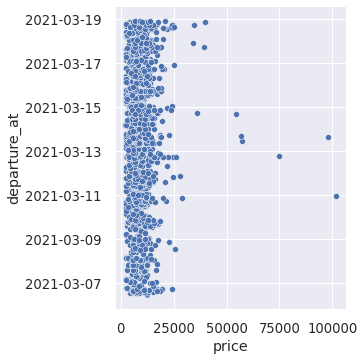

In [17]:
# Plots
sns.set(context='notebook', font_scale=1.2, rc={'figure.figsize':(12,10)})
sns.relplot(x="price", y="departure_at", data=df[df["departure_at"] <= "2021-03-19"])

In [18]:
# We can change the date to ensure that prices depend on it
kzn_soc_dt = df[(df["origin"] == "KZN") & (df["departure_at"] <= "2021-03-27") & (df["destination"] == "AER") & (df["departure_at"] >= "2021-03-26")]
kzn_soc_dt

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
2206,KZN,AER,2021-03-26 16:50:00,A4,316,9436.0,2021-03-06 11:22:22,2021-03-06 10:28:54
6353,KZN,AER,2021-03-26 16:50:00,A4,316,9436.0,2021-03-06 16:32:10,2021-03-06 16:05:28
10509,KZN,AER,2021-03-26 16:50:00,A4,316,9436.0,2021-03-09 07:33:32,2021-03-07 00:43:58
14601,KZN,AER,2021-03-26 16:50:00,A4,316,9431.0,2021-03-09 15:57:04,2021-03-07 12:06:28
22690,KZN,AER,2021-03-26 16:50:00,A4,316,9830.0,2021-03-10 14:23:02,2021-03-08 00:29:40
38501,KZN,AER,2021-03-26 16:50:00,A4,316,10061.0,2021-03-12 12:28:28,2021-03-09 19:08:06
42570,KZN,AER,2021-03-26 07:20:00,S7,1052,9713.0,2021-03-12 17:25:01,2021-03-10 00:31:17
46681,KZN,AER,2021-03-26 07:20:00,S7,1052,9713.0,2021-03-12 14:47:28,2021-03-10 15:29:54
59143,KZN,AER,2021-03-26 07:20:00,S7,1052,9705.0,2021-03-14 04:06:22,2021-03-11 06:30:08
63361,KZN,AER,2021-03-26 16:50:00,A4,316,9452.0,2021-03-14 11:17:08,2021-03-11 12:30:03


Prices on different flights are close to be the same if buying on the same day.

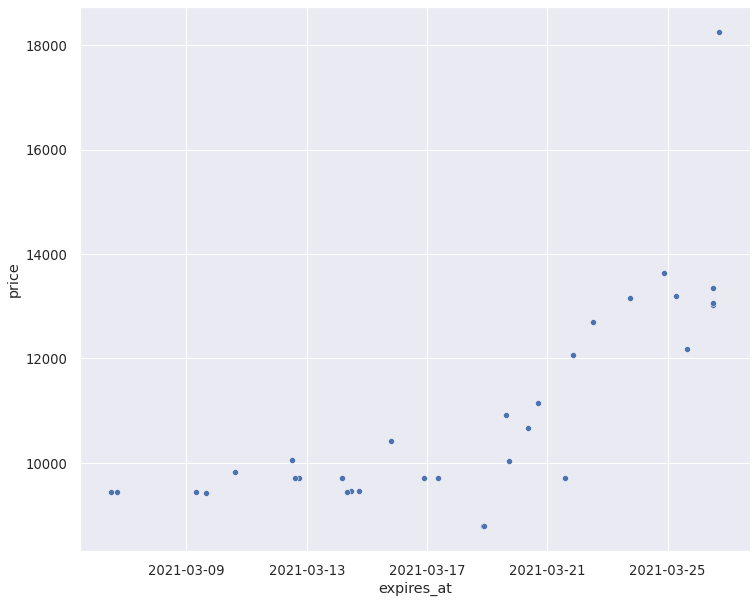

In [19]:
sks = sns.scatterplot(x=kzn_soc_dt["expires_at"], y=kzn_soc_dt["price"])
#sks.set_xticklabels(sks.get_xticklabels(), rotation=30)

departure_at
2021-03-06    18187.000000
2021-03-07     8979.000000
2021-03-08     9538.400000
2021-03-09    10269.888889
2021-03-10     9808.571429
2021-03-11     8863.000000
2021-03-12     8717.222222
2021-03-13     9736.142857
2021-03-14     8686.235294
2021-03-15     8823.736842
2021-03-16     8705.409091
2021-03-17     8732.454545
2021-03-18     9997.952381
2021-03-19    14125.782609
2021-03-20    12944.781250
2021-03-21    12908.347826
2021-03-22    11468.771429
2021-03-23     9401.240000
2021-03-24     9507.333333
2021-03-25     9795.750000
2021-03-26    10927.375000
2021-03-27     8567.200000
2021-03-28     8713.547619
2021-03-29     9093.279070
2021-03-30     8467.913043
2021-03-31     8387.818182
Freq: D, Name: price, dtype: float64

[(18693.0, 18717.51133221675),
 Text(0.5, 1.0, 'Average prices for KZN-AER in March')]

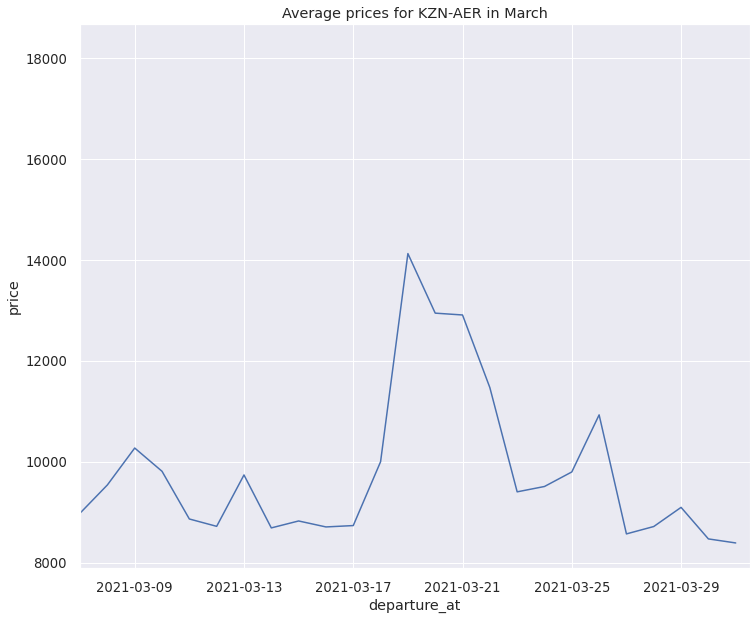

In [20]:
#  Avg prices on each day
kzn_soc = df[(df["origin"] == "KZN") & (df["destination"] == "AER") & (df["departure_at"] <= datetime.now())]
# kzn_soc['day'] = kzn_soc['departure_at'].date
kzn_soc_day = kzn_soc.resample('D', on='departure_at')['price'].mean()
# kzn_soc_day = pd.DataFrame(kzn_soc_day)
# kzn_soc_day['departure_at'] = kzn_soc_day.index
display(kzn_soc_day)
kl = sns.lineplot(data=kzn_soc_day)
kl.set(xlim=(datetime.date(datetime(2021,3,7)), datetime.now()), title="Average prices for KZN-AER in March")

departure_at
0     9880.009804
1     8906.892157
2     9118.000000
3     9715.095238
4    11766.000000
5    10683.915663
6     9852.517647
Name: price, dtype: float64

[Text(0.5, 1.0, 'Average prices for KZN-AER by w-day')]

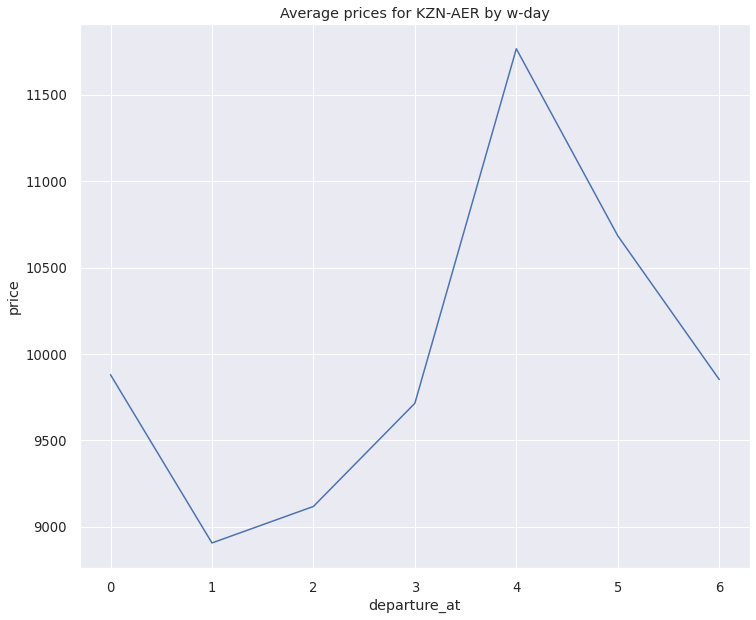

In [21]:
# Avg prices by weekday
kzn_soc_wd = kzn_soc.groupby(kzn_soc['departure_at'].dt.weekday)['price'].mean()
display(kzn_soc_wd)
kwl = sns.lineplot(data=kzn_soc_wd)
kwl.set(title="Average prices for KZN-AER by w-day")

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='price'>)

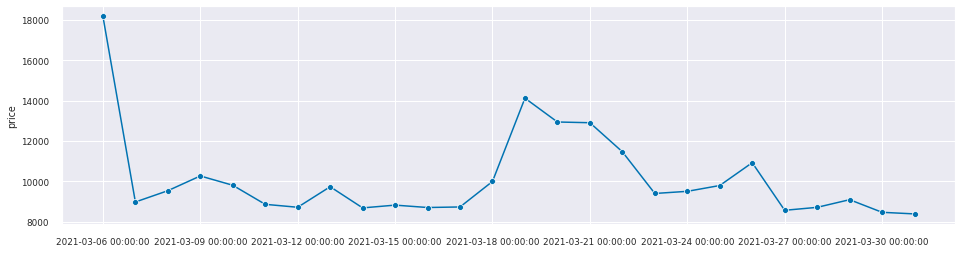

In [23]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA, AutoARIMA

sns.set(font_scale=.8)
y = kzn_soc_day
plot_series(y)

19 7


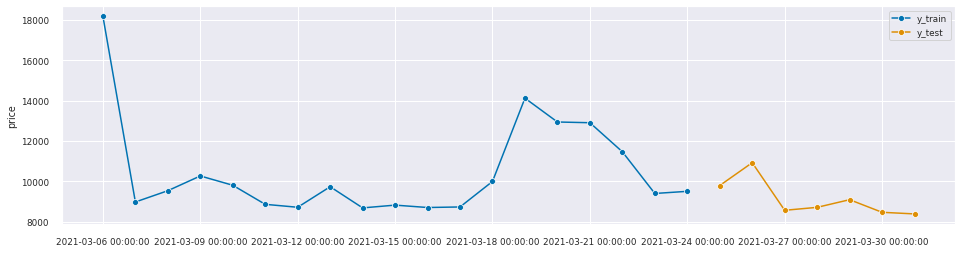

In [24]:
y_train, y_test = temporal_train_test_split(y)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

0.14014307776779264

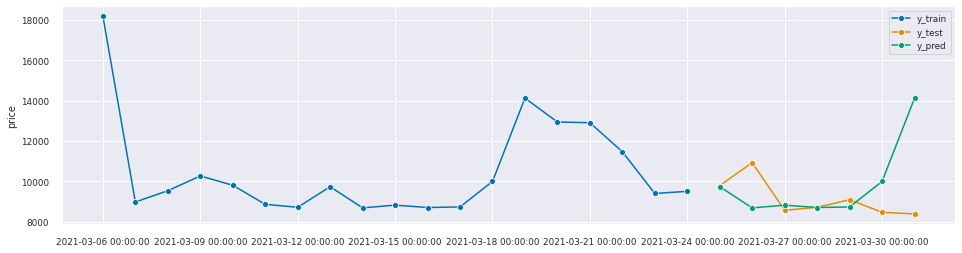

In [25]:
# Naive Forecaster
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

Выглядит немного рандомно

0.3472972440533391

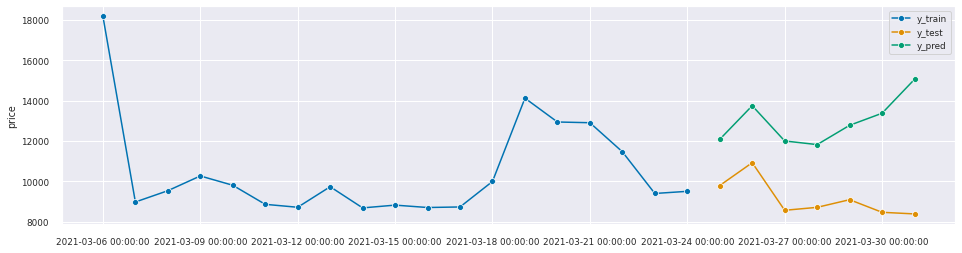

In [36]:
forecaster = AutoARIMA(sp=5, suppress_warnings=True) # 8
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

Тренд установился правильно, но присутствует сдвиг вверх

In [ ]:
# Try different destinations, different models, different statistics

In [27]:
stds = []
for i in set(df["origin"]):
    for j in set(df["destination"]):
        stds.append((df[(df["origin"] == i) & (df["destination"] == j)]["price"].std(),i,j))
clean_std = [i for i in stds if str(i[0]) != "nan"]
clean_std.sort(reverse=True)
clean_std

[(11559.672567038519, 'YKS', 'SVX'),
 (8415.698231046355, 'YKS', 'LED'),
 (7994.448975938392, 'VVO', 'SVX'),
 (7826.148499954069, 'SVX', 'YKS'),
 (7278.571393505107, 'LED', 'YKS'),
 (7128.700119001833, 'SVX', 'VVO'),
 (7011.3310955593, 'CEK', 'KGD'),
 (6049.556048519463, 'MOW', 'VVO'),
 (5528.242592202919, 'SGC', 'SVX'),
 (5207.727772985271, 'CEK', 'SVX'),
 (5019.897876269201, 'MOW', 'YKS'),
 (4895.873381231441, 'MOW', 'KGD'),
 (4880.842664687545, 'VVO', 'LED'),
 (4844.033515303163, 'AER', 'KRR'),
 (4752.124020157171, 'LED', 'CEK'),
 (4629.038061939749, 'KZN', 'CEK'),
 (4599.609197810346, 'LED', 'KRR'),
 (4583.409811159185, 'KZN', 'KRR'),
 (4544.993597846655, 'KZN', 'KGD'),
 (4325.483202535517, 'KZN', 'MOW'),
 (4313.275852777308, 'YKS', 'MOW'),
 (4168.6536991006105, 'LED', 'VVO'),
 (4162.519880406731, 'LED', 'KZN'),
 (3990.59155422564, 'KGD', 'CEK'),
 (3891.2835314113518, 'SVX', 'CEK'),
 (3858.2514907887685, 'MOW', 'SVX'),
 (3808.442863573658, 'KZN', 'SVX'),
 (3795.8531349016876, 'KZN'